Catalin Alexandru Mihalache 31.10.2021 986965

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

TASK 3.1

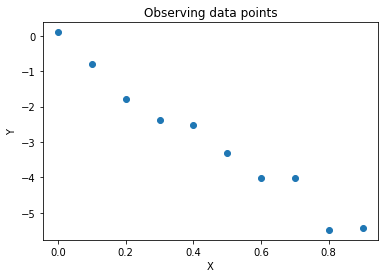

In [23]:
x = np.load('x_values.npy')
y = np.load('y_values.npy')

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Observing data points')
plt.show(block=False)

In [24]:
LR = LinearRegression()
LR.fit(x, y)

test_x_values = np.load('test_x_values.npy')
prediction = LR.predict(test_x_values)

print(test_x_values.shape)
print(prediction.shape) # prediction values for test_x_values

(100, 1)
(100, 1)


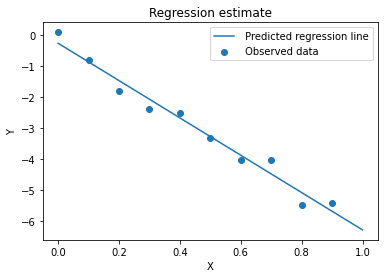

In [25]:
plt.figure()

plt.scatter(x, y, label = " Observed data")
plt.plot(test_x_values, prediction, label = " Predicted regression line")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression estimate')


plt.legend(loc = "upper right")
plt.show(block=False)

In [26]:
test_x = 0.48
predicted_y = LR.predict(np.array(test_x).reshape(1, -1))#reshaping an array into a matrix

print(f'Predicted y value for {test_x} is {predicted_y}')

Predicted y value for 0.48 is [[-3.14442237]]


TASK 3.2

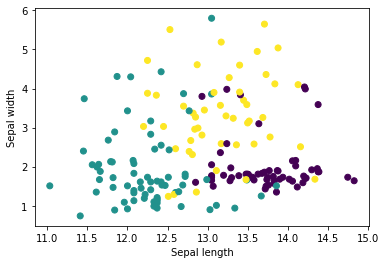

In [27]:
# Load in the Wine dataset
x = np.load('wineData.npy')
y = np.load('wineLabels.npy')

# Plot two feature dimensions against eachother
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show(block=False)

The data is the same iris dataset <br>
3 species of iris: Iris setosa, Iris virginica and Iris versicolor <br>
The features are:<br>
    - sepal length<br>
    - sepal width<br>
    - petal length<br>
    - petal width<br>

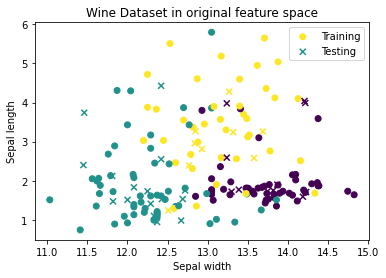

In [28]:
# Select data points to divide into a training and testing set
n = x.shape[0]
split_point = int(n * 0.8)

# Divide the dataset into the two sets
train_data = x[:split_point, :] 
train_labels = y[:split_point] 
test_data = x[split_point:, :] 
test_labels = y[split_point:]

# Plot the training samples, then plot the testing samples over the top with different marker shapes
plt.scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_labels, label = "Training")
plt.scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_labels, label = "Testing")
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')

plt.legend(loc = "upper right")
plt.title('Wine Dataset in original feature space')
plt.show()

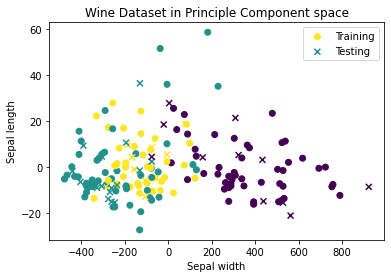

In [29]:
pca = PCA(n_components=2)
pca.fit(train_data)

training_data = pca.transform(train_data)
testing_data = pca.transform(test_data)

plt.scatter(training_data[:, 0], training_data[:, 1], marker='o', c=train_labels, label = "Training")
plt.scatter(testing_data[:, 0], testing_data[:, 1], marker='x', c=test_labels, label = "Testing")
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')

plt.legend(loc = "upper right")
plt.title('Wine Dataset in Principle Component space')
plt.show()

TASK 3.3

In [30]:
# Select data points to divide into a training and testing set
n = x.shape[0]
split_point = int(n * 0.8)

# Divide the dataset into the two sets
train_data = x[:split_point, :] 
train_labels = y[:split_point] 
test_data = x[split_point:, :] 
test_labels = y[split_point:]

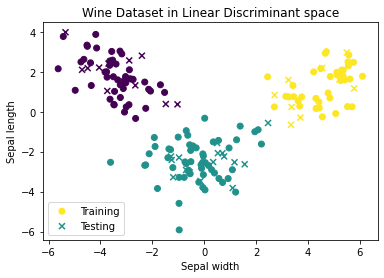

In [31]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(train_data, train_labels)

training_data = lda.transform(train_data)
testing_data = lda.transform(test_data)

plt.scatter(training_data[:, 0], training_data[:, 1], marker='o', c=train_labels, label = "Training")
plt.scatter(testing_data[:, 0], testing_data[:, 1], marker='x', c=test_labels, label = "Testing")
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')

plt.legend(loc = "lower left")
plt.title('Wine Dataset in Linear Discriminant space')
plt.show()

TASK 3.4

In [32]:
# Select data points to divide into a training and testing set
n = x.shape[0]
split_point = int(n * 0.8)

# Divide the dataset into the two sets
train_data = x[:split_point, :] 
train_labels = y[:split_point] 
test_data = x[split_point:, :] 
test_labels = y[split_point:]

In [33]:
n_components=2
# Calculate class mean vector
mu = np.mean(train_data, axis = 0)

#substracting the mean vector
centered_train_data = train_data - mu

u, s, vh = np.linalg.svd(centered_train_data, full_matrices=True)

print(u.shape)
print(s.shape)
print(vh.shape)
projectionmatrix = np.transpose(vh[:n_components,:])
projected_train_data = centered_train_data @ projectionmatrix

(142, 142)
(13,)
(13, 13)


In [34]:
centered_test_data = test_data - mu

u1, s1, vh1 = np.linalg.svd(centered_test_data, full_matrices=True)

print(u1.shape)
print(s1.shape)
print(vh1.shape)
projected_test_data = centered_test_data @ projectionmatrix

(36, 36)
(13,)
(13, 13)


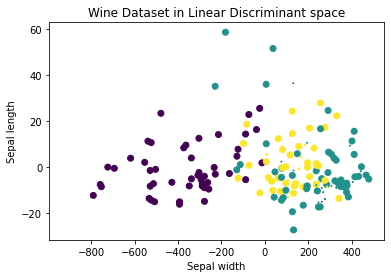

In [35]:
plt.scatter(projected_train_data[:,0],projected_train_data[:,1], marker='o', c=train_labels, label = "Training")
plt.scatter(projected_test_data[:,0], projected_test_data[:,1], test_labels, marker='x', c=test_labels, label = "Testing")
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')

plt.title('Wine Dataset in Linear Discriminant space')
plt.show()

TASK 3.5

In [36]:
x = np.load('task3_5_data.npy')
y = np.load('task3_5_labels.npy')

# print(x.shape)
# print(y.shape)

In [37]:
# Select data points to divide into a training and testing set
n = x.shape[0]
split_point = int(n * 0.8)

# Divide the dataset into the two sets
train_data = x[:split_point, :] 
train_labels = y[:split_point] 
test_data = x[split_point:, :] 
test_labels = y[split_point:]

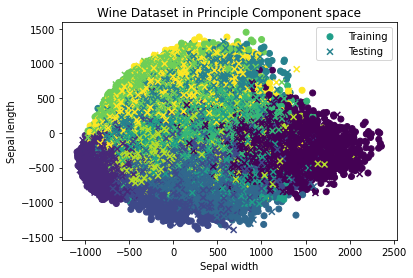

In [38]:
pca = PCA()
pca.fit(train_data)

training_data = pca.transform(train_data)
testing_data = pca.transform(test_data)

plt.scatter(training_data[:, 0], training_data[:, 1], marker='o', c=train_labels, label = "Training")
plt.scatter(testing_data[:, 0], testing_data[:, 1], marker='x', c=test_labels, label = "Testing")
plt.xlabel('Sepal width')
plt.ylabel('Sepal length')

plt.legend(loc = "upper right")
plt.title('Wine Dataset in Principle Component space')
plt.show()

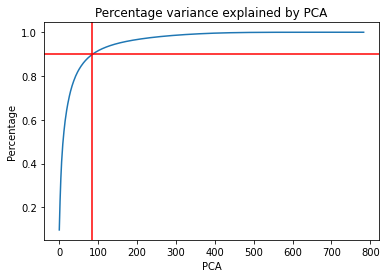

In [58]:
percentage_variance_explained = np.cumsum(pca.explained_variance_ratio_)

plt.plot(percentage_variance_explained)
plt.xlabel("PCA")
plt.ylabel("Percentage")
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.axvline(x = 85, color = 'r', linestyle = '-')
plt.title('Percentage variance explained by PCA')
plt.show(block=False)

The minimum number of component in order to keep 90% of the variance is <b>85.